In [1]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

# Load the Iris dataset
iris = load_iris()

# Split the dataset into features (X) and target (y)
X = iris.data
y = iris.target

# Apply SelectKBest with the chi2 score function to select the top 2 features
selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)

# Get the mask of selected features and apply it to the feature names
selected_features = selector.get_support(indices=True)
selected_feature_names = [iris.feature_names[i] for i in selected_features]

# Display the selected feature names
selected_feature_names


['petal length (cm)', 'petal width (cm)']

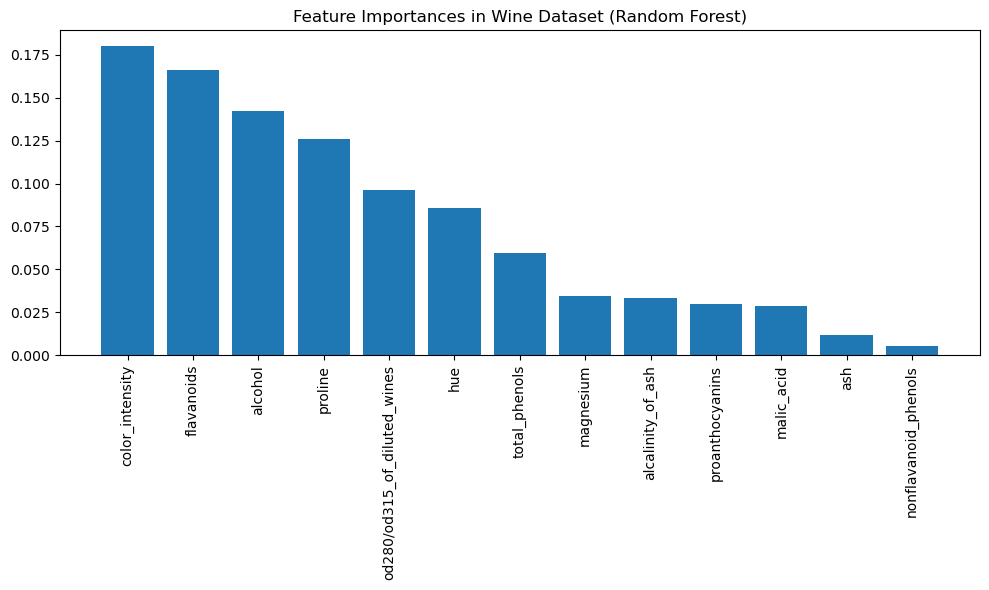

In [3]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Load the Wine dataset
wine = load_wine()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf.feature_importances_

# Get feature names
feature_names = wine.feature_names

# Visualize feature importances
indices = np.argsort(feature_importances)[::-1]  # Sort features by importance

plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Wine Dataset (Random Forest)")
plt.bar(range(X_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=90)
plt.tight_layout()
plt.show()


In [5]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
cancer = load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

# Initialize the SVM classifier
svm = SVC(kernel="linear")

# Apply Recursive Feature Elimination (RFE) to select features
rfe = RFE(estimator=svm, n_features_to_select=10)  # Select top 10 features
rfe.fit(X_train, y_train)

# Transform the training and testing data based on selected features
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the SVM model with the selected features
svm.fit(X_train_rfe, y_train)

# Make predictions on the test data
y_pred = svm.predict(X_test_rfe)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9298245614035088

In [7]:
# Import necessary libraries
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

# Load the Diabetes dataset
diabetes = load_diabetes()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

# Apply Lasso regression for feature selection
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Get the coefficients of the Lasso regression (features with non-zero coefficients are selected)
selected_features = lasso.coef_ != 0
selected_feature_names = [diabetes.feature_names[i] for i in range(len(selected_features)) if selected_features[i]]

# Train a model using only the selected features
X_train_selected = X_train[:, selected_features]
X_test_selected = X_test[:, selected_features]

# Train Lasso regression with the selected features
lasso.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test_selected)

# Evaluate model performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
selected_feature_names, mse


(['sex', 'bmi', 'bp', 's1', 's3', 's5', 's6'], 2775.184056357289)

In [ ]:
# Classification exercises

In [9]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix


(1.0,
 array([[19,  0,  0],
        [ 0, 13,  0],
        [ 0,  0, 13]]))

In [11]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
cancer = load_breast_cancer()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3, random_state=42)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, conf_matrix


(0.9649122807017544,
 array([[ 59,   4],
        [  2, 106]]))

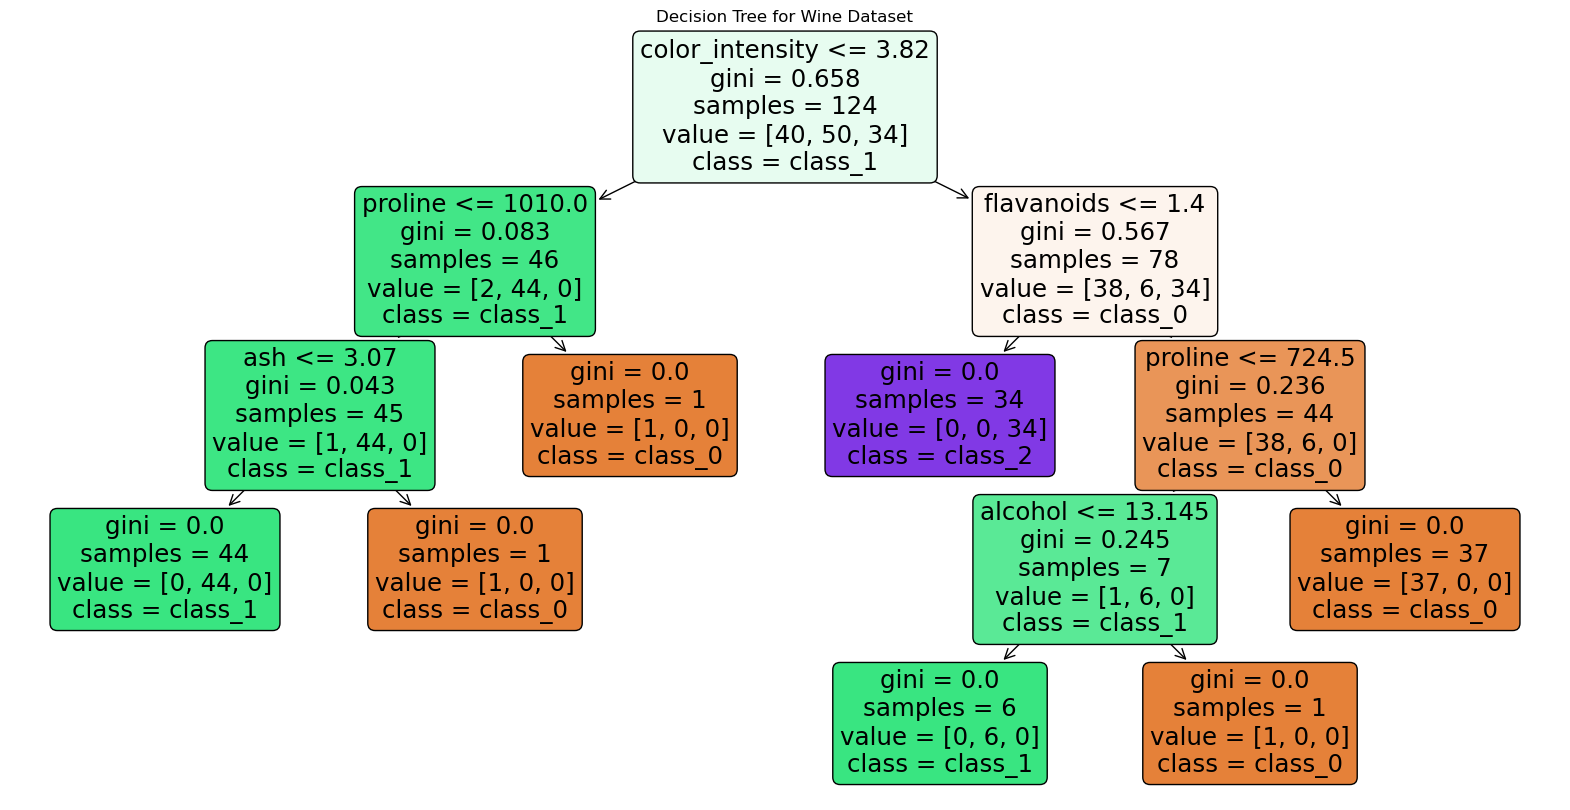

In [13]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Wine dataset
wine = load_wine()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=wine.feature_names, class_names=wine.target_names, rounded=True)
plt.title("Decision Tree for Wine Dataset")
plt.show()


In [17]:
# Import necessary libraries
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston Housing dataset
boston = load_boston()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=42)

# Initialize and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [19]:
# Re-run the Ridge Regression exercise

# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the Diabetes dataset
diabetes = load_diabetes()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.3, random_state=42)

# Initialize and train the Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2


(3112.9664151980814, 0.4233440269603015)

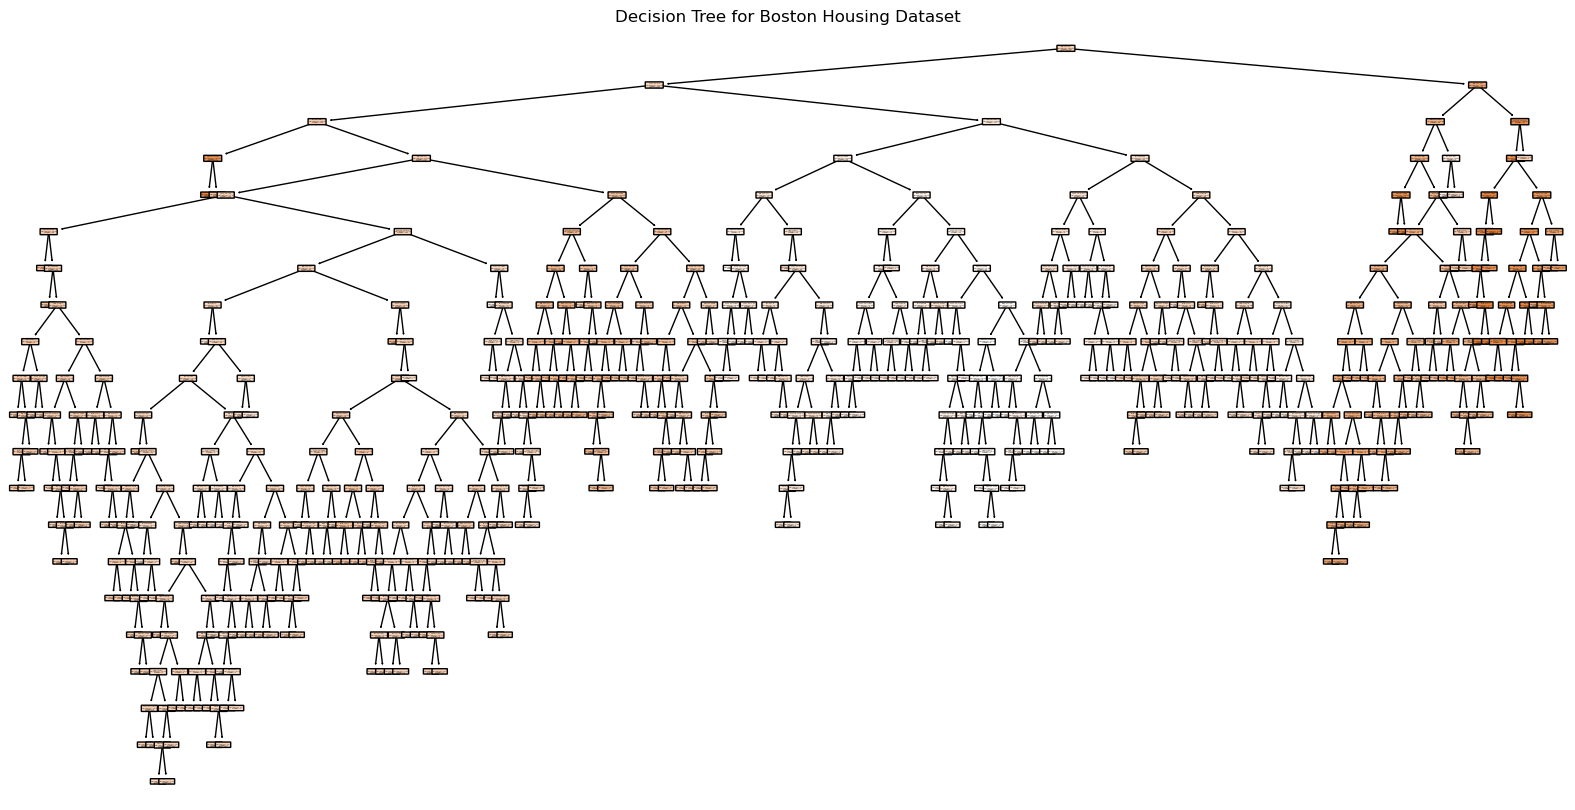

10.832697368421053

In [24]:
# Exercise 3: Decision Tree Regression
# Re-run Decision Tree Regression exercise

# Import necessary libraries for Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load the Boston Housing dataset (as it is deprecated in sklearn, using openml)
boston = fetch_openml(name="boston", version=1, as_frame=False)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=42)

# Initialize and train the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model's performance using MSE
mse_dt = mean_squared_error(y_test, y_pred)

# Visualize the Decision Tree
plt.figure(figsize=(20,10))
plot_tree(dt_regressor, filled=True, feature_names=boston.feature_names, rounded=True)
plt.title("Decision Tree for Boston Housing Dataset")
plt.show()

mse_dt

